# Laboratory 1
    Authors:
    - Roberto Pérez 
    - Arturo Bringas
    - Edgar Bazo
    - Mariana Lugo

# Imports

#### Python libraries

In [214]:
import sys
import pandas as pd
import re
import unicodedata
#from pandas_profiling import ProfileReport
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

#### Acillary modules

In [180]:
%load_ext autoreload
%autoreload 2

from utils.lab1_funcs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading data

Data downloaded from -> https://datos.cdmx.gob.mx/explore/dataset/consumo-agua/export/

In [181]:
df = pd.read_csv("data/consumo-agua.csv")

In [182]:
df

Geo Point  \
0      19.4552601937,-99.1126617526   
1      19.4552601937,-99.1126617526   
2      19.4557195871,-99.1135822797   
3      19.4596467168,-99.1044693641   
4      19.4741606185,-99.1467497317   
...                             ...   
71097  19.4500791776,-99.1444346928   
71098  19.4482098669,-99.1448511226   
71099  19.4478256923,-99.1438192391   
71100  19.4481867455,-99.1423923136   
71101  19.4476825269,-99.1411930304   

                                               Geo Shape  consumo_total_mixto  \
0      {"type": "MultiPolygon", "coordinates": [[[[-9...               159.72   
1      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
2      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
3      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
4      {"type": "MultiPolygon", "coordinates": [[[[-9...                56.72   
...                                                  ...                  ...   
71097  {"type": "MultiPolygon", "coordinates": [[[[-9...               359.88   
71098  {"type": "MultiPolygon", "coordinates": [[[[-9...               401.32   
71099  {"type": "MultiPolygon", "coordinates": [[[[-9...               142.25   
71100  {"type": "MultiPolygon", "coordinates": [[[[-9...                31.42   
71101  {"type": "MultiPolygon", "coordinates": [[[[-9...               976.12   

       anio             nomgeo  consumo_prom_dom  consumo_total_dom  \
0      2019  Gustavo A. Madero         42.566364             468.23   
1      2019  Gustavo A. Madero         35.936667             107.81   
2      2019  Gustavo A. Madero         24.586000             122.93   
3      2019  Gustavo A. Madero          0.000000               0.00   
4      2019       Azcapotzalco         67.436250             539.49   
...     ...                ...               ...                ...   
71097  2019         Cuauhtémoc        282.152488            1128.61   
71098  2019         Cuauhtémoc         25.021442            2777.38   
71099  2019         Cuauhtémoc         27.043654            1406.27   
71100  2019         Cuauhtémoc         18.601529            3162.26   
71101  2019         Cuauhtémoc         23.949699            8765.60   

                alcaldia             colonia  consumo_prom_mixto  \
0      GUSTAVO A. MADERO      7 DE NOVIEMBRE           53.240000   
1      GUSTAVO A. MADERO      7 DE NOVIEMBRE            0.000000   
2      GUSTAVO A. MADERO      7 DE NOVIEMBRE            0.000000   
3      GUSTAVO A. MADERO  NUEVA TENOCHTITLAN            0.000000   
4           AZCAPOTZALCO            PROHOGAR           56.720000   
...                  ...                 ...                 ...   
71097         CUAUHTEMOC            GUERRERO          179.940002   
71098         CUAUHTEMOC            GUERRERO          100.330000   
71099         CUAUHTEMOC            GUERRERO           28.450001   
71100         CUAUHTEMOC            GUERRERO           15.710001   
71101         CUAUHTEMOC            GUERRERO          162.686669   

       consumo_total  consumo_prom  consumo_prom_no_dom  bimestre  \
0             631.00     42.066667             3.050000         3   
1             115.13     28.782500             7.320000         3   
2             197.96     32.993333            75.030000         3   
3             253.53     84.510000            84.510000         3   
4             839.35     76.304545           121.570000         3   
...              ...           ...                  ...       ...   
71097        1509.15    167.683328             6.886667         1   
71098        3318.63     27.426694            23.321667         1   
71099        1586.61     25.590484             7.618000         1   
71100        3250.39     18.260618             9.451667         1   
71101        9858.46     26.011741            16.677143         1   

       consumo_total_no_dom    gid indice_des  
0                      3.05  57250   

# Data profiling

## ¿Cuántas variables tenemos?

In [12]:
count_vars(df)

Número de variables en los datos --> 17


## ¿Cuántas observaciones tenemos?

In [13]:
count_obs(df)

Número de observaciones en los datos --> 71102


## ¿Cuántas observaciones únicas tenemos por variable?

In [14]:
count_unique_obs(df)

Geo Point               22930
Geo Shape               22922
consumo_total_mixto     24339
anio                        1
nomgeo                     17
consumo_prom_dom        52060
consumo_total_dom       47051
alcaldia                   16
colonia                  1340
consumo_prom_mixto      31911
consumo_total           56015
consumo_prom            62214
consumo_prom_no_dom     37440
bimestre                    3
consumo_total_no_dom    27336
gid                     71102
indice_des                  4
dtype: int64

## ¿Cuántas variables numéricas tenemos?

Tenemos 8 variables numéricas

In [98]:
vars_num = [
    "consumo_total_mixto",
    "consumo_prom_dom",
    "consumo_total_dom",
    "consumo_prom_mixto",
    "consumo_total",
    "consumo_prom",
    "consumo_prom_no_dom",
    "consumo_total_no_dom"
]

In [99]:
count_type_vars(vars_num, "numerica")

Número de variables de tipo numerica --> 8


Variable(s)
1   consumo_total_mixto
2      consumo_prom_dom
3     consumo_total_dom
4    consumo_prom_mixto
5         consumo_total
6          consumo_prom
7   consumo_prom_no_dom
8  consumo_total_no_dom

None


## ¿Cuántas variables de fecha tenemos?
- Para efectos de este ejercicio, no hay ninguna variable de tipo fecha, o que consideremos de fecha.

## ¿Cuántas variables categóricas tenemos?

In [100]:
cat_vars = [
    "anio",
    "nomgeo",
    "alcaldia",
    "colonia",
    "bimestre",
    "indice_des",
]

In [18]:
count_type_vars(cat_vars, "categórica")

Número de variables de tipo categórica --> 6


Variable(s)
1        anio
2      nomgeo
3    alcaldia
4     colonia
5    bimestre
6  indice_des

None


## ¿Cuántas variables de texto tenemos?
- Para efectos de este ejercicio, no hay ninguna variable de tipo texto, o que consideremos de texto. Se podría considerar a la variable `gid` como un identificador de texto.

In [19]:
vars_text = ["gid"]

In [20]:
count_type_vars(vars_text, "texto")

Número de variables de tipo texto --> 1


Variable(s)
1         gid

None


## Generea el profiling de cada variable

### Numeric data profiling

- [x] Tipo de dato: float, integer
- [x] Número de observaciones
- [x] Mean
- [x] Desviación estándar
- [x] Cuartiles: 25%, 50%, 75%
- [x] Valor máximo
- [x] Valor mínimo
- [x] Número de observaciones únicos
- [x] Top 5 observaciones repetidas
- [x] Número de observaciones con valores faltantes
- [x] ¿Hay redondeos? -> Se observa que los datos de los totales en el consumo (dom, mixto, no_dom) están a dos decimales desde la fuente. Los datos de los promedios del consumo (dom, mixto, no_dom) tienen seis decimales desde la fuente.  No podemos asegurar que los datos, tanto de los totales, como de los promedios,  están redondeados.

#### Función para perfil de datos numérico

In [183]:
## Data profiling compacted in function
data_profiling_numeric(df, vars_num)

*********************************
** General description of data **
*********************************


consumo_total_mixto consumo_prom_dom consumo_total_dom  \
dtype                    float64          float64           float64   
count_unique               24339            52060             47051   
missing_v                   8327             4820              4820   
count                      62775            66282             66282   
mean                      174.36          29.1324           1186.26   
std                      312.664          64.5659           2771.04   
min                            0                0                 0   
25%                            0          18.6905           161.635   
50%                        79.94          26.4142           604.185   
75%                       233.32          36.2466           1261.45   
max                      23404.4          7796.41           95060.7   

             consumo_prom_mixto consumo_total consumo_prom  \
dtype                   float64       float64      float64   
count_unique              31911         56015        62214   
missing_v                  8327             0            0   
count                     62775         71102        71102   
mean                    50.6362       1695.85      111.217   
std                     130.409        3555.7      1069.95   
min                           0             0            0   
25%                           0       340.952      23.0101   
50%                     33.4517       896.175      31.6938   
75%                     61.2165        1808.9      45.4849   
max                     11702.2        119727      89691.8   

             consumo_prom_no_dom consumo_total_no_dom  
dtype                    float64              float64  
count_unique               37440                27336  
missing_v                      0                    0  
count                      71102                71102  
mean                      126.76               436.06  
std                      1095.82              2126.15  
min                            0                    0  
25%                      6.27542                10.98  
50%                        19.28               54.055  
75%                      54.1869               230.43  
max                      89691.8               119727

None
---------------------------------------------------------------------------
---------------------------------------------------------------------------



****************************
** Top repeated variables **
****************************


consumo_total_mixto                     consumo_prom_dom        \
                    value  count part_notnull            value count   
top_1                 0.0  17715        28.22             0.00  9861   
top_2                36.0     74         0.12             1.22    33   
top_3                17.7     61         0.10            14.64    23   
top_4                36.6     59         0.09            15.25    22   
top_5                18.3     54         0.09            10.98    22   

                   consumo_total_dom                    consumo_prom_mixto  \
      part_notnull             value count part_notnull              value   
top_1        14.88              0.00  9861        14.88               0.00   
top_2         0.05              1.22    37         0.06              36.00   
top_3         0.03             10.98    21         0.03              29.28   
top_4         0.03             25.62    20         0.03              36.60   
top_5         0.03              3.66    20         0.03              23.80   

                          consumo_total                    consumo_prom        \
       count part_notnull         value count part_notnull        value count   
top_1  17715        28.22          0.00  2451         3.45         0.00  2451   
top_2     58         0.09          3.05    70         0.10         1.22    62   
top_3     57         0.09          1.22    68         0.10         3.05    55   
top_4     53         0.08          3.66    42         0.06         4.27    43   
top_5     49         0.08          6.71    41         0.06         6.71    39   

                   consumo_prom_no_dom                     \
      part_notnull               value count part_notnull   
top_1         3.45                0.00  8109        11.40   
top_2         0.09                1.22   330         0.46   
top_3         0.08                1.83   290         0.41   
top_4         0.06                3.05   260         0.37   
top_5         0.05                4.27   216         0.30   

      consumo_total_no_dom                     
                     value count part_notnull  
top_1                 0.00  8109        11.40  
top_2                 1.22   402         0.57  
top_3                 1.83   316         0.44  
top_4                 3.05   302         0.42  
top_5                 7.93   219         0.31

None
---------------------------------------------------------------------------
---------------------------------------------------------------------------



### Categoric data profiling

**Profiling: Variables categóricas**

- [x] Número de categorías
- [x] Valor de las categorías
- [x] Moda
- [x] Valores faltantes
- [x] Número de observaciones con valores faltantes
- [x] Proporción de observaciones por categoría
- [x] Top 1, top 2, top 3 (moda 1, moda 2, moda 3)
- [x] Faltas de ortografía ?

In [184]:
#data profiling function
data_profiling_categ(df,cat_vars)

*********************************
Variable Categorica anio
*********************************


Info                        anio
Num_Registros              71102
Num_de_categorias              1
Moda                        2019
Valores_faltantes              0
Top1               [2019, 71102]
Top2                           0
Top3                           0

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                          
2019               71102     100.0%

None



*********************************
Variable Categorica nomgeo
*********************************


Info                                   nomgeo
Num_Registros                           71102
Num_de_categorias                          17
Moda                               Iztapalapa
Valores_faltantes                           0
Top1                      [Iztapalapa, 10515]
Top2               [Gustavo A. Madero, 10058]
Top3                       [Cuauhtémoc, 7313]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                                       
Iztapalapa                      10515      14.8%
Gustavo A. Madero               10058      14.1%
Cuauhtémoc                       7313      10.3%
Benito Juárez                    6049       8.5%
Venustiano Carranza              5179       7.3%
Miguel Hidalgo                   5110       7.2%
Coyoacán                         4947       7.0%
Azcapotzalco                     4216       5.9%
Álvaro Obregón                   4140       5.8%
Iztacalco                        3469       4.9%
Xochimilco                       2450       3.4%
Talpan                           2140       3.0%
Tláhuac                          1955       2.7%
Tlalpan                          1064       1.5%
La Magdalena Contreras            955       1.3%
Cuajimalpa de Morelos             892       1.3%
Milpa Alta                        650       0.9%

None



*********************************
Variable Categorica alcaldia
*********************************


Info                                 alcaldia
Num_Registros                           71102
Num_de_categorias                          16
Moda                               IZTAPALAPA
Valores_faltantes                           0
Top1                      [IZTAPALAPA, 10515]
Top2               [GUSTAVO A. MADERO, 10058]
Top3                       [CUAUHTEMOC, 7313]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                                    
IZTAPALAPA                   10515      14.8%
GUSTAVO A. MADERO            10058      14.1%
CUAUHTEMOC                    7313      10.3%
BENITO JUAREZ                 6049       8.5%
VENUSTIANO CARRANZA           5179       7.3%
MIGUEL HIDALGO                5110       7.2%
COYOACAN                      4947       7.0%
AZCAPOTZALCO                  4216       5.9%
ALVARO OBREGON                4140       5.8%
IZTACALCO                     3469       4.9%
TLALPAN                       3204       4.5%
XOCHIMILCO                    2450       3.4%
TLAHUAC                       1955       2.7%
MAGDALENA CONTRERAS            955       1.3%
CUAJIMALPA                     892       1.3%
MILPA ALTA                     650       0.9%

None



*********************************
Variable Categorica colonia
*********************************


Info                                colonia
Num_Registros                         71102
Num_de_categorias                      1340
Moda                                 CENTRO
Valores_faltantes                         0
Top1                         [CENTRO, 1139]
Top2               [AGRICOLA ORIENTAL, 837]
Top3                      [ROMA NORTE, 602]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                                     
CENTRO                         1139       1.6%
AGRICOLA ORIENTAL               837       1.2%
ROMA NORTE                      602       0.8%
MOCTEZUMA 2A SECCION            558       0.8%
JARDIN BALBUENA                 498       0.7%
...                             ...        ...
PIRU SECC. I                      2       0.0%
HUIZACHITO                        2       0.0%
CALZADA JALALPA                   2       0.0%
U. HAB. NUEVA ROSITA              1       0.0%
SANTISIMA TRINIDAD                1       0.0%

[1340 rows x 2 columns]

None



*********************************
Variable Categorica bimestre
*********************************


Info                 bimestre
Num_Registros           71102
Num_de_categorias           3
Moda                        2
Valores_faltantes           0
Top1               [2, 23942]
Top2               [3, 23822]
Top3               [1, 23338]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                          
2                  23942      33.7%
3                  23822      33.5%
1                  23338      32.8%

None



*********************************
Variable Categorica indice_des
*********************************


Info                     indice_des
Num_Registros                 71102
Num_de_categorias                 4
Moda                           BAJO
Valores_faltantes                 0
Top1                  [BAJO, 29248]
Top2               [POPULAR, 16539]
Top3                  [ALTO, 15516]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                          
BAJO               29248      41.1%
POPULAR            16539      23.3%
ALTO               15516      21.8%
MEDIO               9799      13.8%

None





### Additional data profiling

- En este ejercicio particular no se contó con variables del siguiente tipo para hacer el profiling:
    - Imágen
    - Audio

## ¿Qué conocemos ahora de este set de datos por variable?

1. ¿Cuántas alcadías tienes?
    - Hay un total de 16 alcaldías

2. ¿Cuántos `nomgeo` tienes?
    - Hay un total de 17 nomgeo

3. ¿Identificas algún error?
    - Hay una categoría con un error ortográfico: Existen 2140 observaciones en la columna **nomgeo** que dice: Talpan y 1064 observaciones que dicen: Tlalpan

## Transformar el nombre de las columnas a formato estándar: minúsculas, sin espacios en blanco -cambiar por guiónes bajos-, sin signos de puntuación

In [185]:
df_cleancols = clean_col_names(df)

In [186]:
df_cleancols

geo_point  \
0      19.4552601937,-99.1126617526   
1      19.4552601937,-99.1126617526   
2      19.4557195871,-99.1135822797   
3      19.4596467168,-99.1044693641   
4      19.4741606185,-99.1467497317   
...                             ...   
71097  19.4500791776,-99.1444346928   
71098  19.4482098669,-99.1448511226   
71099  19.4478256923,-99.1438192391   
71100  19.4481867455,-99.1423923136   
71101  19.4476825269,-99.1411930304   

                                               geo_shape  consumo_total_mixto  \
0      {"type": "MultiPolygon", "coordinates": [[[[-9...               159.72   
1      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
2      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
3      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
4      {"type": "MultiPolygon", "coordinates": [[[[-9...                56.72   
...                                                  ...                  ...   
71097  {"type": "MultiPolygon", "coordinates": [[[[-9...               359.88   
71098  {"type": "MultiPolygon", "coordinates": [[[[-9...               401.32   
71099  {"type": "MultiPolygon", "coordinates": [[[[-9...               142.25   
71100  {"type": "MultiPolygon", "coordinates": [[[[-9...                31.42   
71101  {"type": "MultiPolygon", "coordinates": [[[[-9...               976.12   

       anio             nomgeo  consumo_prom_dom  consumo_total_dom  \
0      2019  Gustavo A. Madero         42.566364             468.23   
1      2019  Gustavo A. Madero         35.936667             107.81   
2      2019  Gustavo A. Madero         24.586000             122.93   
3      2019  Gustavo A. Madero          0.000000               0.00   
4      2019       Azcapotzalco         67.436250             539.49   
...     ...                ...               ...                ...   
71097  2019         Cuauhtémoc        282.152488            1128.61   
71098  2019         Cuauhtémoc         25.021442            2777.38   
71099  2019         Cuauhtémoc         27.043654            1406.27   
71100  2019         Cuauhtémoc         18.601529            3162.26   
71101  2019         Cuauhtémoc         23.949699            8765.60   

                alcaldia             colonia  consumo_prom_mixto  \
0      GUSTAVO A. MADERO      7 DE NOVIEMBRE           53.240000   
1      GUSTAVO A. MADERO      7 DE NOVIEMBRE            0.000000   
2      GUSTAVO A. MADERO      7 DE NOVIEMBRE            0.000000   
3      GUSTAVO A. MADERO  NUEVA TENOCHTITLAN            0.000000   
4           AZCAPOTZALCO            PROHOGAR           56.720000   
...                  ...                 ...                 ...   
71097         CUAUHTEMOC            GUERRERO          179.940002   
71098         CUAUHTEMOC            GUERRERO          100.330000   
71099         CUAUHTEMOC            GUERRERO           28.450001   
71100         CUAUHTEMOC            GUERRERO           15.710001   
71101         CUAUHTEMOC            GUERRERO          162.686669   

       consumo_total  consumo_prom  consumo_prom_no_dom  bimestre  \
0             631.00     42.066667             3.050000         3   
1             115.13     28.782500             7.320000         3   
2             197.96     32.993333            75.030000         3   
3             253.53     84.510000            84.510000         3   
4             839.35     76.304545           121.570000         3   
...              ...           ...                  ...       ...   
71097        1509.15    167.683328             6.886667         1   
71098        3318.63     27.426694            23.321667         1   
71099        1586.61     25.590484             7.618000         1   
71100        3250.39     18.260618             9.451667         1   
71101        9858.46     26.011741            16.677143         1   

       consumo_total_no_dom    gid indice_des  
0                      3.05  57250   

## Transformación de variables geoespaciales
- Agregar la variable `latitud` y `longitud` generadas a partir de la column `geo_point`.
- Pasar la variable `latitud` y `longitud` a numérica -si no la tomó como numérica-.
- Eliminar la columna `geo_point` -una vez que creaste la variable `latitud` y `longitud`.
- Eliminar la columna `geo_shape`.
- Cambiar a minúsculas las columnas `alcaldía`, `colonia` e `indice_des`.

In [187]:
df_geotransform = geo_transformation(df_cleancols, "geo_point", "geo_shape")
df_geotransform

consumo_total_mixto  anio             nomgeo  consumo_prom_dom  \
0                   159.72  2019  Gustavo A. Madero         42.566364   
1                     0.00  2019  Gustavo A. Madero         35.936667   
2                     0.00  2019  Gustavo A. Madero         24.586000   
3                     0.00  2019  Gustavo A. Madero          0.000000   
4                    56.72  2019       Azcapotzalco         67.436250   
...                    ...   ...                ...               ...   
71097               359.88  2019         Cuauhtémoc        282.152488   
71098               401.32  2019         Cuauhtémoc         25.021442   
71099               142.25  2019         Cuauhtémoc         27.043654   
71100                31.42  2019         Cuauhtémoc         18.601529   
71101               976.12  2019         Cuauhtémoc         23.949699   

       consumo_total_dom           alcaldia             colonia  \
0                 468.23  GUSTAVO A. MADERO      7 DE NOVIEMBRE   
1                 107.81  GUSTAVO A. MADERO      7 DE NOVIEMBRE   
2                 122.93  GUSTAVO A. MADERO      7 DE NOVIEMBRE   
3                   0.00  GUSTAVO A. MADERO  NUEVA TENOCHTITLAN   
4                 539.49       AZCAPOTZALCO            PROHOGAR   
...                  ...                ...                 ...   
71097            1128.61         CUAUHTEMOC            GUERRERO   
71098            2777.38         CUAUHTEMOC            GUERRERO   
71099            1406.27         CUAUHTEMOC            GUERRERO   
71100            3162.26         CUAUHTEMOC            GUERRERO   
71101            8765.60         CUAUHTEMOC            GUERRERO   

       consumo_prom_mixto  consumo_total  consumo_prom  consumo_prom_no_dom  \
0               53.240000         631.00     42.066667             3.050000   
1                0.000000         115.13     28.782500             7.320000   
2                0.000000         197.96     32.993333            75.030000   
3                0.000000         253.53     84.510000            84.510000   
4               56.720000         839.35     76.304545           121.570000   
...                   ...            ...           ...                  ...   
71097          179.940002        1509.15    167.683328             6.886667   
71098          100.330000        3318.63     27.426694            23.321667   
71099           28.450001        1586.61     25.590484             7.618000   
71100           15.710001        3250.39     18.260618             9.451667   
71101          162.686669        9858.46     26.011741            16.677143   

       bimestre  consumo_total_no_dom    gid indice_des    latitud   longitud  
0             3                  3.05  57250       ALTO  19.455260 -99.112662  
1             3                  7.32  57253      MEDIO  19.455260 -99.112662  
2             3                 75.03  57255    POPULAR  19.455720 -99.113582  
3             3                253.53  57267       BAJO  19.459647 -99.104469  
4             3                243.14  57330       BAJO  19.474161 -99.146750  
...         ...                   ...    ...        ...        ...        ...  
71097         1                 20.66    236       BAJO  19.450079 -99.144435  
71098         1                139.93    240       BAJO  19.448210 -99.144851  
71099         1                 38.09    241    POPULAR  19.447826 -99.143819  
71100         1                 56.71    243       BAJO  19.448187 -99.142392  
71101         1                116.74    246       BAJO  19.447683 -99.141193  

[71102 rows x 17 columns]

## Geospatial data profiling

In [188]:
geo_vars = ["latitud", "longitud"]

geo_vars_precision(df_geotransform, geo_vars)

No. of entries - latitud  No. of entries - longitud
No. of decimals                                                     
10                                  64044                      64152
9                                    6274                       6316
8                                     712                        580
7                                      69                         39
6                                       3                         12

None


- Cambiar a minúsculas las columnas `alcaldía`, `colonia` e `indice_des`.

In [189]:
vars_lower=["indice_des", "alcaldia", "colonia","nomgeo"]

df_lower_values = convert_lower(df_geotransform, vars_lower)

## Corrección de observaciones seleccionadas

- Nótese que hay una entrada llamada "talpan" que debería ser "tlalpan"

In [190]:
 df_lower_values["nomgeo"].value_counts()

iztapalapa                10515
gustavo a. madero         10058
cuauhtémoc                 7313
benito juárez              6049
venustiano carranza        5179
miguel hidalgo             5110
coyoacán                   4947
azcapotzalco               4216
álvaro obregón             4140
iztacalco                  3469
xochimilco                 2450
talpan                     2140
tláhuac                    1955
tlalpan                    1064
la magdalena contreras      955
cuajimalpa de morelos       892
milpa alta                  650
Name: nomgeo, dtype: int64

In [191]:
dicc_cor = {
    "nomgeo": {
        "talpan": "tlalpan"
    }
}

In [192]:
df_correct = correct_selected_entries(df_lower_values, dicc_cor)

In [193]:
df_correct["nomgeo"].value_counts() 

iztapalapa                10515
gustavo a. madero         10058
cuauhtémoc                 7313
benito juárez              6049
venustiano carranza        5179
miguel hidalgo             5110
coyoacán                   4947
azcapotzalco               4216
álvaro obregón             4140
iztacalco                  3469
tlalpan                    3204
xochimilco                 2450
tláhuac                    1955
la magdalena contreras      955
cuajimalpa de morelos       892
milpa alta                  650
Name: nomgeo, dtype: int64

# Review Changes

## ¿Cuántas variables tenemos?

In [115]:
count_vars(df_correct)

Número de variables en los datos --> 17


## ¿Cuántas observaciones tenemos?

In [116]:
count_obs(df_correct)

Número de observaciones en los datos --> 71102


## ¿Cuántas observaciones únicas tenemos por variable?

In [117]:
count_unique_obs(df_correct)

consumo_total_mixto     24339
anio                        1
nomgeo                     16
consumo_prom_dom        52060
consumo_total_dom       47051
alcaldia                   16
colonia                  1340
consumo_prom_mixto      31911
consumo_total           56015
consumo_prom            62214
consumo_prom_no_dom     37440
bimestre                    3
consumo_total_no_dom    27336
gid                     71102
indice_des                  4
latitud                 22930
longitud                22930
dtype: int64

## ¿Cuántas variables numéricas tenemos?

In [118]:
vars_num = [
    "consumo_total_mixto",
    "consumo_prom_dom",
    "consumo_total_dom",
    "consumo_prom_mixto",
    "consumo_total",
    "consumo_prom",
    "consumo_prom_no_dom",
    "consumo_total_no_dom"]

In [119]:
count_type_vars(vars_num, "numerica")

Número de variables de tipo numerica --> 8


Variable(s)
1   consumo_total_mixto
2      consumo_prom_dom
3     consumo_total_dom
4    consumo_prom_mixto
5         consumo_total
6          consumo_prom
7   consumo_prom_no_dom
8  consumo_total_no_dom

None


## ¿Cuántas variables de fecha tenemos?
- Para efectos de este ejercicio, no hay ninguna variable de tipo fecha, o que consideremos de fecha.

## ¿Cuántas variables categóricas tenemos?

In [120]:
cat_vars = [
    "anio",
    "nomgeo",
    "alcaldia",
    "colonia",
    "bimestre",
    "indice_des",
]

In [121]:
count_type_vars(cat_vars, "categórica")

Número de variables de tipo categórica --> 6


Variable(s)
1        anio
2      nomgeo
3    alcaldia
4     colonia
5    bimestre
6  indice_des

None


## ¿Cuántas variables de texto tenemos?
- Para efectos de este ejercicio, no hay ninguna variable de tipo texto, o que consideremos de texto. Se podría considerar a la variable `gid` como un identificador de texto.

In [122]:
vars_text = ["gid"]

In [123]:
count_type_vars(vars_text, "texto")

Número de variables de tipo texto --> 1


Variable(s)
1         gid

None


## Genera el profiling de cada variable

In [124]:
## Data profiling compacted in function
data_profiling_numeric(df_correct, vars_num)

*********************************
** General description of data **
*********************************


consumo_total_mixto consumo_prom_dom consumo_total_dom  \
dtype                    float64          float64           float64   
count_unique               24339            52060             47051   
missing_v                   8327             4820              4820   
count                      62775            66282             66282   
mean                      174.36          29.1324           1186.26   
std                      312.664          64.5659           2771.04   
min                            0                0                 0   
25%                            0          18.6905           161.635   
50%                        79.94          26.4142           604.185   
75%                       233.32          36.2466           1261.45   
max                      23404.4          7796.41           95060.7   

             consumo_prom_mixto consumo_total consumo_prom  \
dtype                   float64       float64      float64   
count_unique              31911         56015        62214   
missing_v                  8327             0            0   
count                     62775         71102        71102   
mean                    50.6362       1695.85      111.217   
std                     130.409        3555.7      1069.95   
min                           0             0            0   
25%                           0       340.952      23.0101   
50%                     33.4517       896.175      31.6938   
75%                     61.2165        1808.9      45.4849   
max                     11702.2        119727      89691.8   

             consumo_prom_no_dom consumo_total_no_dom  
dtype                    float64              float64  
count_unique               37440                27336  
missing_v                      0                    0  
count                      71102                71102  
mean                      126.76               436.06  
std                      1095.82              2126.15  
min                            0                    0  
25%                      6.27542                10.98  
50%                        19.28               54.055  
75%                      54.1869               230.43  
max                      89691.8               119727

None
---------------------------------------------------------------------------
---------------------------------------------------------------------------



****************************
** Top repeated variables **
****************************


consumo_total_mixto                     consumo_prom_dom        \
                    value  count part_notnull            value count   
top_1                 0.0  17715        28.22             0.00  9861   
top_2                36.0     74         0.12             1.22    33   
top_3                17.7     61         0.10            14.64    23   
top_4                36.6     59         0.09            15.25    22   
top_5                18.3     54         0.09            10.98    22   

                   consumo_total_dom                    consumo_prom_mixto  \
      part_notnull             value count part_notnull              value   
top_1        14.88              0.00  9861        14.88               0.00   
top_2         0.05              1.22    37         0.06              36.00   
top_3         0.03             10.98    21         0.03              29.28   
top_4         0.03             25.62    20         0.03              36.60   
top_5         0.03              3.66    20         0.03              23.80   

                          consumo_total                    consumo_prom        \
       count part_notnull         value count part_notnull        value count   
top_1  17715        28.22          0.00  2451         3.45         0.00  2451   
top_2     58         0.09          3.05    70         0.10         1.22    62   
top_3     57         0.09          1.22    68         0.10         3.05    55   
top_4     53         0.08          3.66    42         0.06         4.27    43   
top_5     49         0.08          6.71    41         0.06         6.71    39   

                   consumo_prom_no_dom                     \
      part_notnull               value count part_notnull   
top_1         3.45                0.00  8109        11.40   
top_2         0.09                1.22   330         0.46   
top_3         0.08                1.83   290         0.41   
top_4         0.06                3.05   260         0.37   
top_5         0.05                4.27   216         0.30   

      consumo_total_no_dom                     
                     value count part_notnull  
top_1                 0.00  8109        11.40  
top_2                 1.22   402         0.57  
top_3                 1.83   316         0.44  
top_4                 3.05   302         0.42  
top_5                 7.93   219         0.31

None
---------------------------------------------------------------------------
---------------------------------------------------------------------------



In [125]:
df_correct["nomgeo"].value_counts() 

iztapalapa                10515
gustavo a. madero         10058
cuauhtémoc                 7313
benito juárez              6049
venustiano carranza        5179
miguel hidalgo             5110
coyoacán                   4947
azcapotzalco               4216
álvaro obregón             4140
iztacalco                  3469
tlalpan                    3204
xochimilco                 2450
tláhuac                    1955
la magdalena contreras      955
cuajimalpa de morelos       892
milpa alta                  650
Name: nomgeo, dtype: int64

In [126]:
#data profiling function
data_profiling_categ(df_correct,cat_vars)

*********************************
Variable Categorica anio
*********************************


Info                        anio
Num_Registros              71102
Num_de_categorias              1
Moda                        2019
Valores_faltantes              0
Top1               [2019, 71102]
Top2                           0
Top3                           0

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                          
2019               71102     100.0%

None



*********************************
Variable Categorica nomgeo
*********************************


Info                                   nomgeo
Num_Registros                           71102
Num_de_categorias                          16
Moda                               iztapalapa
Valores_faltantes                           0
Top1                      [iztapalapa, 10515]
Top2               [gustavo a. madero, 10058]
Top3                       [cuauhtémoc, 7313]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                                       
iztapalapa                      10515      14.8%
gustavo a. madero               10058      14.1%
cuauhtémoc                       7313      10.3%
benito juárez                    6049       8.5%
venustiano carranza              5179       7.3%
miguel hidalgo                   5110       7.2%
coyoacán                         4947       7.0%
azcapotzalco                     4216       5.9%
álvaro obregón                   4140       5.8%
iztacalco                        3469       4.9%
tlalpan                          3204       4.5%
xochimilco                       2450       3.4%
tláhuac                          1955       2.7%
la magdalena contreras            955       1.3%
cuajimalpa de morelos             892       1.3%
milpa alta                        650       0.9%

None



*********************************
Variable Categorica alcaldia
*********************************


Info                                 alcaldia
Num_Registros                           71102
Num_de_categorias                          16
Moda                               iztapalapa
Valores_faltantes                           0
Top1                      [iztapalapa, 10515]
Top2               [gustavo a. madero, 10058]
Top3                       [cuauhtemoc, 7313]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                                    
iztapalapa                   10515      14.8%
gustavo a. madero            10058      14.1%
cuauhtemoc                    7313      10.3%
benito juarez                 6049       8.5%
venustiano carranza           5179       7.3%
miguel hidalgo                5110       7.2%
coyoacan                      4947       7.0%
azcapotzalco                  4216       5.9%
alvaro obregon                4140       5.8%
iztacalco                     3469       4.9%
tlalpan                       3204       4.5%
xochimilco                    2450       3.4%
tlahuac                       1955       2.7%
magdalena contreras            955       1.3%
cuajimalpa                     892       1.3%
milpa alta                     650       0.9%

None



*********************************
Variable Categorica colonia
*********************************


Info                                colonia
Num_Registros                         71102
Num_de_categorias                      1340
Moda                                 centro
Valores_faltantes                         0
Top1                         [centro, 1139]
Top2               [agricola oriental, 837]
Top3                      [roma norte, 602]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                                     
centro                         1139       1.6%
agricola oriental               837       1.2%
roma norte                      602       0.8%
moctezuma 2a seccion            558       0.8%
jardin balbuena                 498       0.7%
...                             ...        ...
huizachito                        2       0.0%
piru secc. i                      2       0.0%
calzada jalalpa                   2       0.0%
santisima trinidad                1       0.0%
u. hab. nueva rosita              1       0.0%

[1340 rows x 2 columns]

None



*********************************
Variable Categorica bimestre
*********************************


Info                 bimestre
Num_Registros           71102
Num_de_categorias           3
Moda                        2
Valores_faltantes           0
Top1               [2, 23942]
Top2               [3, 23822]
Top3               [1, 23338]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                          
2                  23942      33.7%
3                  23822      33.5%
1                  23338      32.8%

None



*********************************
Variable Categorica indice_des
*********************************


Info                     indice_des
Num_Registros                 71102
Num_de_categorias                 4
Moda                           bajo
Valores_faltantes                 0
Top1                  [bajo, 29248]
Top2               [popular, 16539]
Top3                  [alto, 15516]

None
Valores de las categorias y sus proporciones


Observaciones proporción
Categoría                          
bajo               29248      41.1%
popular            16539      23.3%
alto               15516      21.8%
medio               9799      13.8%

None





## Data profiling

In [127]:
#profile = ProfileReport(df_correct, title="Pandas Profiling Report", explorative = True)

In [46]:
#profile

In [47]:
#profile.to_file("Profile_variables.html")

# GEDA

## Barplots

In [128]:
cat_vars = [
    "anio",
    "nomgeo",
    "alcaldia",
    "colonia",
    "bimestre",
    "indice_des",
]

In [204]:
barplot_cat(df_test, "alcaldia", tops=10)

Otras_categs contiene la siguiente información: 
    -> 6 categorías (37.50%)
    -> su conteo de valores representa el (14.21%) del conteo total


## Histogramas

In [215]:
vars_num = [
    "consumo_total_mixto",
    "consumo_prom_dom",
    "consumo_total_dom",
    "consumo_prom_mixto",
    "consumo_total",
    "consumo_prom",
    "consumo_prom_no_dom",
    "consumo_total_no_dom"]
vars_num_tot= [
    "consumo_total_mixto",
    "consumo_total_dom",
    "consumo_total",
    "consumo_total_no_dom",
    "indice_des"]

vars_num_prom= [
    "consumo_prom_dom",
    "consumo_prom_mixto",
    "consumo_prom",
    "consumo_prom_no_dom",
    "indice_des"]

vars_num_i= [
    "consumo_total_mixto",
    "consumo_prom_dom",
    "consumo_total_dom",
    "consumo_prom_mixto",
    "consumo_total",
    "consumo_prom",
    "consumo_prom_no_dom",
    "consumo_total_no_dom",
    "indice_des",
    "alcaldia"]

Se muestra toda la distribución completa de las variables numéricas.

## **Falta hacer lista para que no sobreescriba la figura**

In [216]:
def histograms_numeric_total(data,vars_num):
    """
    Function to create histograms 
        args:
            data (dataframe): data that will be analized
            vars_num (list): list of numeric variables that will be plotted
        returns:
            -
    """
    for i in vars_num: 
        fig=px.histogram(data, x=data[i])
    return fig.show()

In [217]:
histograms_numeric_total(df_correct,vars_num)

Se muestra el histograma por `indice_des` de las variables numéricas ajustando el eje x al rango intercuartil (IQR).

## **Falta hacer lista para que no sobreescriba la figura y muestre todas las variables**

In [195]:
def histograms_numeric(data, vars_num):
    for i in vars_num: 
        fig=px.histogram(data, x=data[i], color="indice_des")
        fig.update_traces(opacity=.75)
        fig.update_xaxes(range=[0,1.5*(data[i].quantile(.75)-data[i].quantile(.25))])
    return fig.show()

In [196]:
histograms_numeric(df_correct, vars_num)

Distribución del consumo de agua por `indice_des`y por alacadía.
## Falta hacer código en función

In [198]:
df_work=df_correct[vars_num_i]

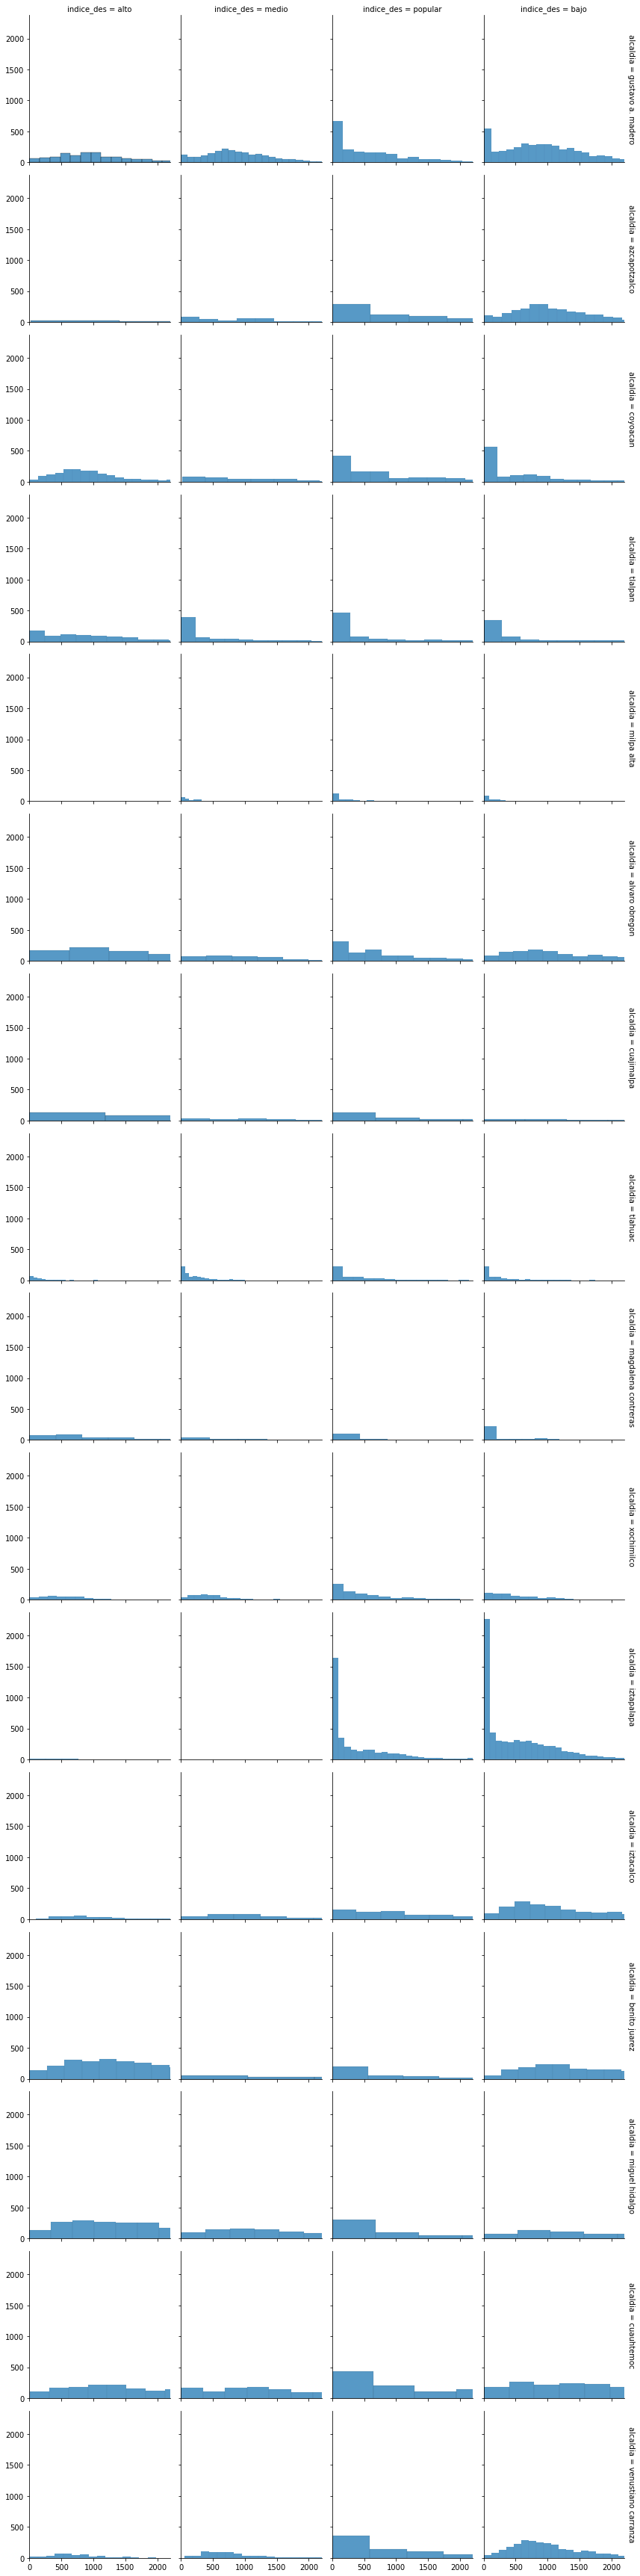

In [199]:
g=sns.FacetGrid(df_work, col="indice_des", row="alcaldia",margin_titles=True)
g.map_dataframe(sns.histplot, x="consumo_total")
IQR=1.5*(df_work["consumo_total"].quantile(.75)-df_work["consumo_total"].quantile(.25))
g.set(xlim=(0,IQR))
g

## Falta validar esta posible función y hacer lista para que muestra todas las variables numéricas

In [246]:
def histograms_numeric_i(data, vars_num, alcaldia_selec):
    dfx=data[data.alcaldia== alcaldia_selec]
    for i in vars_num: 
        g=sns.FacetGrid(dfx, col="indice_des", margin_titles=True)
        g.map(sns.histplot, x=dfx[i])
        IQR=1.5*(dfx[i].quantile(.75)-dfx[i].quantile(.25))
        g.set(xlim=(0,IQR))
        g.set_axis_labels(i,"Count")

    return g

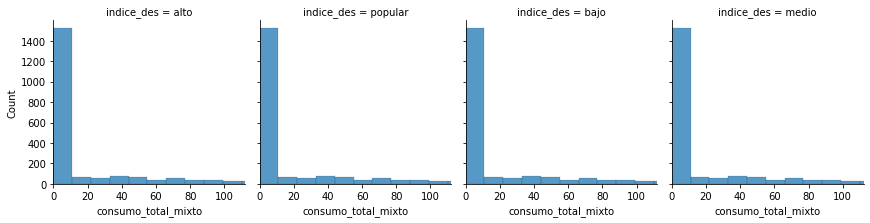

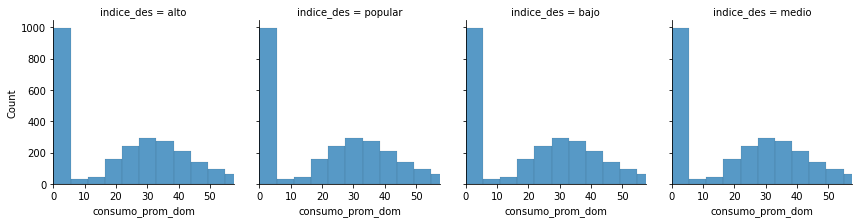

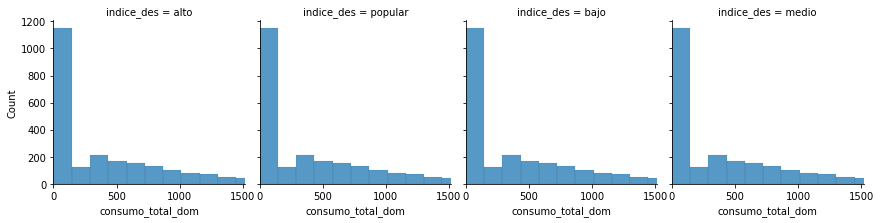

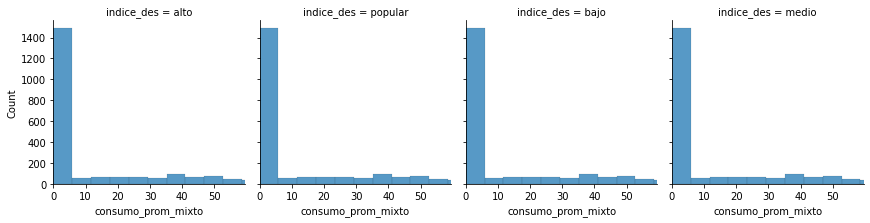

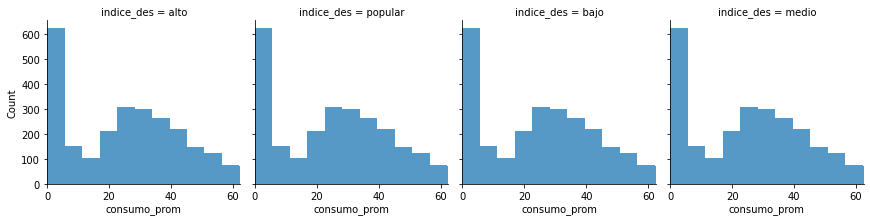

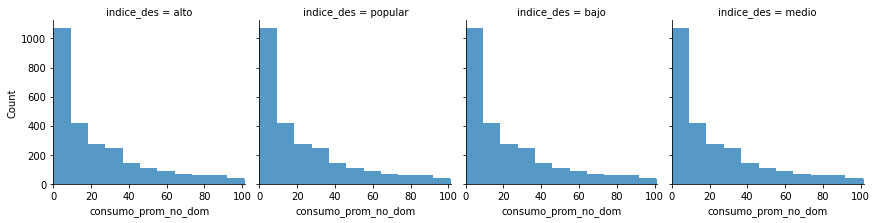

In [247]:
histograms_numeric_i(df_work, vars_num, "tlalpan")

## Boxplots

## Falta hacer lista en la función para que se muestren las figuras de todas las variables numéricas. 

In [237]:
def box_plot_num(data,vars_num,alcaldia_selec):
    for i in vars_num:
        bp=px.box(data, x="indice_des", y=data[i])
    return bp.show()

In [175]:
box_plot_num(df_correct, vars_num)

## Boxplot por alcaldía

In [248]:
def box_plot_num(data,vars_num, alcaldia_selec):
    dfx=data[data.alcaldia== alcaldia_selec]
    for i in vars_num:
        bp=px.box(dfx, x="indice_des", y=dfx[i])
    return bp.show()

In [249]:
box_plot_num(df_correct, vars_num, "iztapalapa")